## Import Libraries

In [1]:
import pandas as pd
import timeit
start = timeit.default_timer()

## Data Preprocessing

### A breif introduction of Dataset
The dataset has download from Kaggle. The dataset is about Life Expectancy which mean what could be average life expectancy of the country people with the given variables details. Here dependent variable is Life expectancy and rest of the other variable is dependent variable.

In [2]:
dataset = pd.read_csv('Regression.csv')
dataset.head(5)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [3]:
dataset.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object

### Correlation Coefficients
Correlation coefficients are used to measure the strength of the relationship between two variables. This measures the strength and direction of a linear relationship between two variables. Values always range between -1 (strong negative relationship) and +1 (strong positive relationship).

In [4]:
corr_matrix = dataset.corr()
print(corr_matrix["Life expectancy "].sort_values(ascending=False))

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


## Import a Module

### Initializing the setup
Common to all modules in PyCaret, setup is the first and the only mandatory step to start any machine learning experiment. Besides performing some basic processing tasks by default, PyCaret also offers wide array of pre-processing features which structurally elevates an average machine learning experiment to an advanced solution. 


In [5]:
from pycaret.regression import*
exp_name = setup(data = dataset, target = 'Life expectancy ', session_id=123, train_size=0.80,
                 ignore_features = ['Year','infant deaths', 'Hepatitis B','Measles ','under-five deaths ', 'Total expenditure', 'Population'],
                 normalize = True,
                 transformation = True, transformation_method = 'yeo-johnson',
                 transform_target = True, remove_outliers = True,
                 remove_multicollinearity = True,
                 ignore_low_variance = True, combine_rare_levels = True,
                 high_cardinality_features = ['Country', 'Status'],
                 log_experiment = True, experiment_name = 'life')

,Description,Value
0,session_id,123
1,Target,Life expectancy
2,Original Data,"(2938, 22)"
3,Missing Values,True
4,Numeric Features,12
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(2223, 12)"


2021/01/25 13:09:40 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



### Comapre Model
This is the first step PyCaret recommend in the workflow of any supervised experiment. This function trains all the models in the model library using default hyperparameters and evaluates performance metrics using cross-validation. It returns the trained model object. The evaluation metrics used are:<br>
Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE<br>
I have use timeit library, how much time pycaret compare module take to run its program.

In [6]:
best = compare_models(fold=5)
stop = timeit.default_timer()
print('Time :', stop-start)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0706,3.5186,1.8717,0.9592,0.0295,0.0165,0.1800
catboost,CatBoost Regressor,1.2666,4.0761,2.0157,0.9527,0.0318,0.0194,2.6480
lightgbm,Light Gradient Boosting Machine,1.3273,4.1773,2.0403,0.9516,0.0319,0.0203,0.0400
rf,Random Forest Regressor,1.2700,4.2159,2.0463,0.9512,0.0321,0.0195,0.2500
xgboost,Extreme Gradient Boosting,1.3069,4.2835,2.0637,0.9503,0.0321,0.0200,0.5320
gbr,Gradient Boosting Regressor,1.6865,5.8095,2.4045,0.9326,0.0379,0.0259,0.0860
dt,Decision Tree Regressor,1.6591,7.7477,2.7735,0.9105,0.0430,0.0256,0.0180
knn,K Neighbors Regressor,2.0602,8.8461,2.9688,0.8974,0.0470,0.0318,0.0320
ada,AdaBoost Regressor,2.6218,12.0605,3.4687,0.8604,0.0558,0.0412,0.0480
br,Bayesian Ridge,2.8932,15.3257,3.9099,0.8225,0.0620,0.0450,0.0100


Time : 41.9880689


## Creating Model

Createting model in a PyCaret is so easy just need to write create_model. which mean we can select best model from compare model which can be selected by the shortcut of its name. Here i have selected 'lr' Linear Regression, 'svm' Support Vector Machine and 'dt' Decision Tree.

In [7]:
lr = create_model('lr', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8769,16.8805,4.1086,0.8094,0.0698,0.0468
1,2.9067,14.8712,3.8563,0.8172,0.0589,0.0441
2,2.8842,15.1292,3.8896,0.8310,0.0606,0.0444
3,2.7309,13.4963,3.6737,0.8531,0.0589,0.0433
4,2.8740,15.6867,3.9606,0.8002,0.0624,0.0442
5,3.2791,20.6386,4.5430,0.7964,0.0735,0.0520
6,2.9014,15.1002,3.8859,0.8363,0.0608,0.0448
7,2.8598,13.7053,3.7021,0.8174,0.0579,0.0440
8,2.9722,16.1195,4.0149,0.8201,0.0634,0.0462
9,2.6116,11.5721,3.4018,0.8429,0.0521,0.0395


In [8]:
svm = create_model('svm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5059,5.9094,2.4309,0.9333,0.0418,0.0244
1,1.4811,5.1884,2.2778,0.9362,0.0346,0.0223
2,1.5313,6.7188,2.5921,0.9250,0.0412,0.0237
3,1.3345,3.9772,1.9943,0.9567,0.0307,0.0206
4,1.5207,5.7359,2.3950,0.9269,0.0377,0.0234
5,1.7269,7.3211,2.7058,0.9278,0.0431,0.0271
6,1.5238,6.4368,2.5371,0.9302,0.0404,0.0238
7,1.4002,4.3267,2.0801,0.9424,0.0317,0.0213
8,1.7158,6.5455,2.5584,0.9270,0.0391,0.0261
9,1.5106,5.7439,2.3966,0.9220,0.0360,0.0226


In [9]:
dt = create_model('dt',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5892,7.3656,2.7140,0.9168,0.0427,0.0247
1,1.4744,6.4945,2.5484,0.9202,0.0381,0.0223
2,1.5422,6.4957,2.5487,0.9274,0.0380,0.0229
3,1.7351,9.1627,3.0270,0.9003,0.0482,0.0265
4,1.7234,9.5588,3.0917,0.8783,0.0485,0.0267
5,1.8243,9.9233,3.1501,0.9021,0.0515,0.0293
6,1.6410,7.3037,2.7025,0.9208,0.0421,0.0252
7,1.5874,7.4794,2.7348,0.9004,0.0422,0.0242
8,2.0392,11.6848,3.4183,0.8696,0.0531,0.0317
9,1.4572,5.9596,2.4412,0.9191,0.0354,0.0216


### Tune Model
Tuning hyperparameters of a machine learning model in any module is as simple as writing tune_model. It tunes the hyperparameter of the model passed as an estimator using Random grid search with pre-defined grids that are fully customizable. Optimizing the hyperparameters of a model requires an objective function which is linked to target variable automatically in supervised experiments such as Classification or Regression.<br>
Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

In [10]:
tune_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.8948,8.7166,2.9524,0.9016,0.0481,0.0299
1,1.6263,6.3476,2.5195,0.9220,0.0376,0.0245
2,1.7257,6.8405,2.6154,0.9236,0.0394,0.0259
3,1.7606,7.0703,2.6590,0.9231,0.0422,0.0272
4,1.8147,9.0045,3.0008,0.8853,0.0460,0.0277
5,1.9472,9.8152,3.1329,0.9032,0.0519,0.0311
6,1.5584,5.8343,2.4154,0.9367,0.0371,0.0237
7,1.8147,7.3085,2.7034,0.9026,0.0432,0.0279
8,2.4118,14.6939,3.8333,0.8360,0.0598,0.0378
9,1.7030,5.7506,2.3980,0.9220,0.0354,0.0253


In [11]:
tune_lr = tune_model(lr, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8769,16.8805,4.1086,0.8094,0.0698,0.0468
1,2.9067,14.8712,3.8563,0.8172,0.0589,0.0441
2,2.8842,15.1292,3.8896,0.8310,0.0606,0.0444
3,2.7309,13.4963,3.6737,0.8531,0.0589,0.0433
4,2.8740,15.6867,3.9606,0.8002,0.0624,0.0442
5,3.2791,20.6386,4.5430,0.7964,0.0735,0.0520
6,2.9014,15.1002,3.8859,0.8363,0.0608,0.0448
7,2.8598,13.7053,3.7021,0.8174,0.0579,0.0440
8,2.9722,16.1195,4.0149,0.8201,0.0634,0.0462
9,2.6116,11.5721,3.4018,0.8429,0.0521,0.0395


## Model Visualization

### Plot Model
Analyzing performance of trained machine learning model is an integral step in any machine learning workflow. Analyzing model performance in PyCaret is as simple as writing plot_model. The function takes trained model object and type of plot as string within plot_model function.<br>
I have used 'error plot' for Linear Regression, I have 'residual graph' for Support Vector Machine and for Decision Tree i have plot 'feature important plot'.

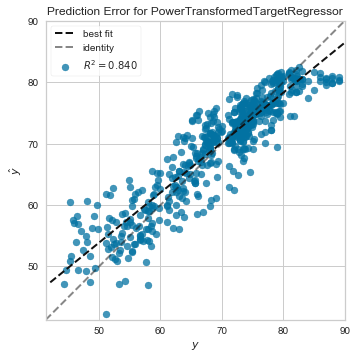

In [12]:
plot_model(lr, plot = 'error')

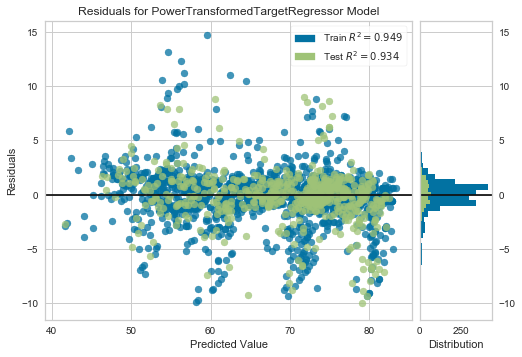

In [13]:
plot_model(svm, plot = 'residuals')

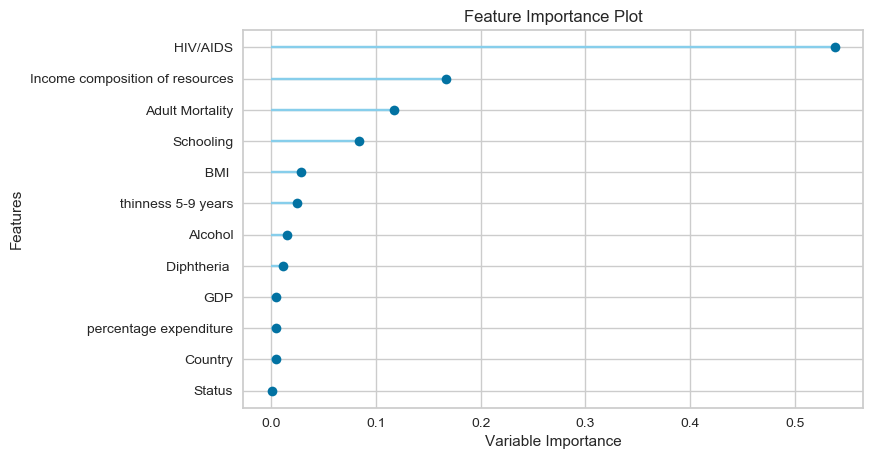

In [14]:
plot_model(dt, plot = 'feature_all')

## Model Ensembling

### Ensemble Bagging
Bagging:
Bagging, also known as Bootstrap aggregating, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

In [15]:
# Ensemble bagging
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5892,7.3656,2.7140,0.9168,0.0427,0.0247
1,1.4744,6.4945,2.5484,0.9202,0.0381,0.0223
2,1.5422,6.4957,2.5487,0.9274,0.0380,0.0229
3,1.7351,9.1627,3.0270,0.9003,0.0482,0.0265
4,1.7234,9.5588,3.0917,0.8783,0.0485,0.0267
5,1.8243,9.9233,3.1501,0.9021,0.0515,0.0293
6,1.6410,7.3037,2.7025,0.9208,0.0421,0.0252
7,1.5874,7.4794,2.7348,0.9004,0.0422,0.0242
8,2.0392,11.6848,3.4183,0.8696,0.0531,0.0317
9,1.4572,5.9596,2.4412,0.9191,0.0354,0.0216


In [16]:
bagged_dt = ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3023,4.8416,2.2004,0.9453,0.0373,0.0206
1,1.2347,3.8192,1.9543,0.9531,0.0297,0.0186
2,1.2933,4.5434,2.1315,0.9493,0.0324,0.0197
3,1.2478,3.5909,1.8950,0.9609,0.0290,0.0191
4,1.3496,5.2730,2.2963,0.9328,0.0355,0.0207
5,1.5267,5.5444,2.3547,0.9453,0.0387,0.0242
6,1.3186,4.4762,2.1157,0.9515,0.0323,0.0200
7,1.1949,3.4855,1.8670,0.9536,0.0292,0.0183
8,1.4395,5.1222,2.2632,0.9428,0.0350,0.0221
9,1.2603,3.7152,1.9275,0.9496,0.0289,0.0190


### Blend Model
Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome. Blending models in PyCaret is as simple as writing blend_models. 

In [17]:
blender = blend_models(estimator_list=[dt,svm,lr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6688,7.0806,2.6609,0.9200,0.0465,0.0272
1,1.6006,5.3451,2.3120,0.9343,0.0359,0.0244
2,1.6096,6.1721,2.4844,0.9311,0.0382,0.0245
3,1.6067,5.1047,2.2594,0.9444,0.0355,0.0252
4,1.7437,7.2607,2.6946,0.9075,0.0423,0.0269
5,1.9708,8.8300,2.9715,0.9129,0.0489,0.0314
6,1.7097,6.2533,2.5007,0.9322,0.0392,0.0262
7,1.5849,4.9647,2.2282,0.9339,0.0343,0.0242
8,1.9100,7.6447,2.7649,0.9147,0.0434,0.0297
9,1.5530,5.1986,2.2800,0.9294,0.0342,0.0232


In [18]:
print(blender.estimators_)

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)]


## Model Deployment

### Predict Model
Predict model can be used to predict on unseen data using predict_model function. This functions takes a trained model object and the dataset to predict. It will automatically apply the entire transformation pipeline created during the experiment.<br>
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. The higher the R-squared, the better the model fits your data. Here the best model is 'decision tree' for the given dataset.

In [19]:
predictModelsvm = predict_model(svm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,1.5739,5.9545,2.4402,0.9339,0.0356,0.0233


In [20]:
predictModellr = predict_model(tune_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2.8425,14.4411,3.8001,0.8396,0.0592,0.0436


In [21]:
predictModeldt = predict_model(bagged_dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1.2841,4.1097,2.0272,0.9544,0.0294,0.0191
